# Лабораторная работа №2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split

from sklearn import tree

from sklearn.metrics import classification_report

## Приведенная выборка из ЛР1

In [2]:
df = pd.read_csv("heart_2022_with_nans.csv")
df = df.dropna() 
df.drop_duplicates()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
342,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
343,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
345,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
346,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
347,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445117,Virgin Islands,Male,Very good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.78,102.06,32.28,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No
445123,Virgin Islands,Female,Fair,0.0,7.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.93,90.72,24.34,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
445124,Virgin Islands,Male,Good,0.0,15.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,1.68,83.91,29.86,Yes,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes
445128,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No


In [3]:
num_columns = ["SleepHours",
               "BMI"]

str_columns = ["Sex", 
               "GeneralHealth", 
               "PhysicalActivities",
               "HadHeartAttack", 
               "CovidPos", 
               "HadKidneyDisease",
               "AlcoholDrinkers",
               "HadDiabetes",
               "SmokerStatus",
               "AgeCategory"]

selected_df = df.loc[:, list(num_columns + str_columns)]

encoder = preprocessing.LabelEncoder()
for key in str_columns:
    selected_df[key] = encoder.fit_transform(selected_df[key])

scaler = preprocessing.StandardScaler()
selected_df[num_columns] = scaler.fit_transform(selected_df[num_columns])

selected_df


,SleepHours,BMI,Sex,GeneralHealth,PhysicalActivities,HadHeartAttack,CovidPos,HadKidneyDisease,AlcoholDrinkers,HadDiabetes,SmokerStatus,AgeCategory
342,1.373428,-0.104105,0,4,1,0,0,0,0,0,2,9
343,-0.708924,0.224420,1,4,1,0,0,0,0,2,2,10
345,0.679311,0.459300,1,4,0,0,2,0,1,0,2,11
346,1.373428,0.407105,0,1,1,0,2,0,0,0,3,12
347,-1.403041,0.675759,0,2,1,0,0,0,0,0,3,12
...,...,...,...,...,...,...,...,...,...,...,...,...
445117,-0.708924,0.554481,1,4,1,0,0,0,1,0,3,8
445123,-0.014807,-0.664440,0,1,1,0,2,0,0,0,3,1
445124,-0.014807,0.182971,1,2,1,0,2,0,1,2,3,9
445128,-0.014807,-0.001249,0,0,1,0,0,0,0,0,3,6


## Построение моделей

In [4]:
Y = selected_df["HadHeartAttack"]
X = selected_df.drop("HadHeartAttack", axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)
X.info()

(172215, 11) (172215,)
(73807, 11) (73807,)
<class 'pandas.core.frame.DataFrame'>
Index: 246022 entries, 342 to 445130
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   SleepHours          246022 non-null  float64
 1   BMI                 246022 non-null  float64
 2   Sex                 246022 non-null  int64  
 3   GeneralHealth       246022 non-null  int64  
 4   PhysicalActivities  246022 non-null  int64  
 5   CovidPos            246022 non-null  int64  
 6   HadKidneyDisease    246022 non-null  int64  
 7   AlcoholDrinkers     246022 non-null  int64  
 8   HadDiabetes         246022 non-null  int64  
 9   SmokerStatus        246022 non-null  int64  
 10  AgeCategory         246022 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 22.5 MB


**Почему 42?**
> Использование числа 42 в качестве параметра **random_state** в машинном обучении на самом деле является отсылкой к научно-фантастическому сериалу Дугласа Адамса «Автостопом по галактике». В сериале число 42 известно как «Ответ на главный вопрос жизни, Вселенной и всего остального», хотя сам вопрос неизвестен. Это юмористическая и причудливая отсылка, которая была принята сообществом программистов и специалистов по обработке данных.

**Реализуем метод k-ближайших соседей** 

Зададим ограничения, где

- **n_neighbors** - количество соседей

- **weights** - Весовая функция, где
    - *uniform*  - одинаковые веса. Все точки в каждой окрестности имеют одинаковый вес.
    - *distance* - вес точек обратно пропорционален их расстоянию. В этом случае более близкие соседи точки запроса будут иметь большее влияние, чем соседи, находящиеся дальше.
    
- **p** - Параметр для метрики Минковского (1 - Манхэттенское расстояние, 2- Евклидово)

Плюсы KNN:
- практически не чувствителен к выбросам
- нет необходимости строить модель, настраивать несколько параметров или делать дополнительные допущения.
- алгоритм универсален. Его можно использовать для обоих типов задач: классификации и регрессии.


In [5]:
knn_params = { 
    'n_neighbors' : [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1.0, 2.0]
}

knn_clf = KNeighborsClassifier()
knn_grid = GridSearchCV(knn_clf, knn_params, cv=5, n_jobs=-1)
knn_grid.fit(X_train, Y_train)

knn_best_model = knn_grid.best_estimator_
knn_grid.best_params_


{'n_neighbors': 9, 'p': 1.0, 'weights': 'uniform'}

**Реализуем машину опорных векторов** 

Зададим ограничения, где

- **kernel** - ядро (линейное, радиальная базовая функция)

- **C** - компенсирует неправильную классификацию обучающих примеров простотой поверхности принятия решений. Низкое значение C делает поверхность принятия решения гладкой
    
- **gamma** -  определяет, какое влияние имеет один обучающий пример. Чем больше gamma, тем ближе другие примеры должны быть затронуты

Плюсы SVC:
- Эффективен в пространствах больших размеров.

Жирный минус:
- ооооооооооооооооооооооочень долго обучается.

In [6]:
svc_params = {
    'kernel':['linear'], 
    'C':[0.0001], 
    'gamma':[1],
    'probability': [True]
    }

svc_clf = SVC()
svc_grid = GridSearchCV(svc_clf, svc_params, cv=5, n_jobs=-1)
svc_grid.fit(X_train, Y_train)

svc_best_model = svc_grid.best_estimator_
svc_grid.best_params_

{'C': 0.0001, 'gamma': 1, 'kernel': 'linear', 'probability': True}

**Реализуем случайный лес** 

Зададим ограничения, где

- n_estimators - число используемых деревьев

- max_depth - максимальная глубина дерева

- min_samples_leaf - минимальное число объектов в листе

- min_samples_split - минимальное кол-во выборок, необходимое для разделения внутреннего узла

Плюсы случайного леса:
- высокая точность прогнозов
- практически не чувствителен к выбросам
- не чувствителен к масштабированию
- легко параллелится

In [7]:
rf_params = { 'n_estimators': [10, 50, 100],
              'max_depth': range (1, 11, 4),
              'min_samples_leaf': range (1, 8, 4),
              'min_samples_split': range (2, 10, 4) }

rf_clf = RandomForestClassifier()
rf_grid = GridSearchCV(rf_clf, rf_params, cv=5, n_jobs=-1)
rf_grid.fit(X_train, Y_train)

rf_best_model = rf_grid.best_estimator_
rf_grid.best_params_

{'max_depth': 9,
 'min_samples_leaf': 5,
 'min_samples_split': 6,
 'n_estimators': 10}

## Оценка качества прогноза
Расчет precision, recall, f1-score и ROC-AUC для каждой модели

In [8]:
models = [knn_best_model, svc_best_model, rf_best_model]

for m in models:
    y_pred = m.predict(X_test)
    print(m, 
          '\n', 
          classification_report(Y_test, y_pred.round(0)), 
          '------------------------')
    print("ROC-AUC:", roc_auc_score(Y_test, y_pred))

KNeighborsClassifier(n_neighbors=9, p=1.0) 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     69809
           1       0.24      0.01      0.03      3998

    accuracy                           0.94     73807
   macro avg       0.59      0.51      0.50     73807
weighted avg       0.91      0.94      0.92     73807
 ------------------------
ROC-AUC: 0.5060608076961742
SVC(C=0.0001, gamma=1, kernel='linear', probability=True) 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     69809
           1       0.00      0.00      0.00      3998

    accuracy                           0.95     73807
   macro avg       0.47      0.50      0.49     73807
weighted avg       0.89      0.95      0.92     73807
 ------------------------
ROC-AUC: 0.5
RandomForestClassifier(max_depth=9, min_samples_leaf=5, min_samples_split=6,
                       n_estimators=10) 
               precision    reca

/Users/linearlys/Documents/Учеба/Машинное обучение/source/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/linearlys/Documents/Учеба/Машинное обучение/source/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/linearlys/Documents/Учеба/Машинное обучение/source/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

## Визуализация предсказанных значений
Precision можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными, а recall показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.

KNeighborsClassifier(n_neighbors=9, p=1.0)


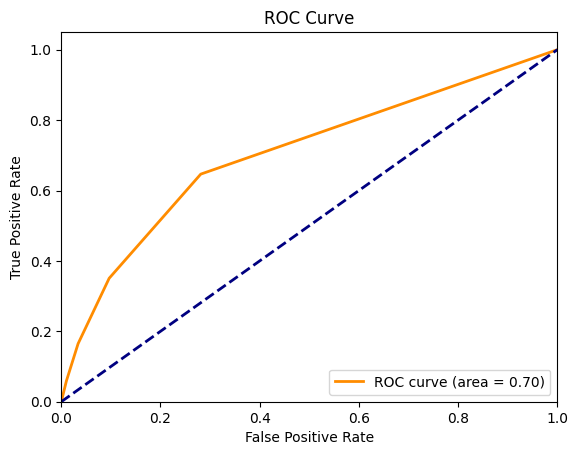

SVC(C=0.0001, gamma=1, kernel='linear', probability=True)


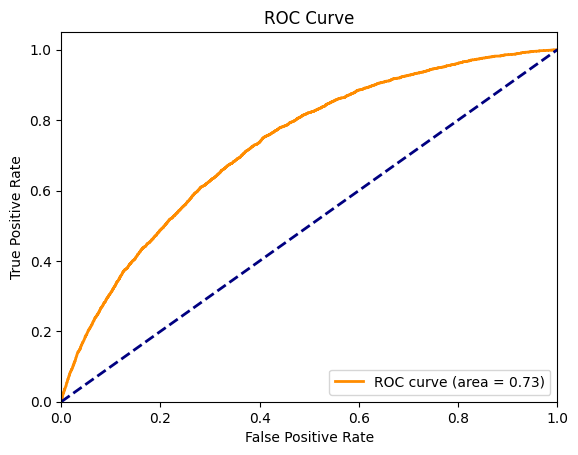

RandomForestClassifier(max_depth=9, min_samples_leaf=5, min_samples_split=6,
                       n_estimators=10)


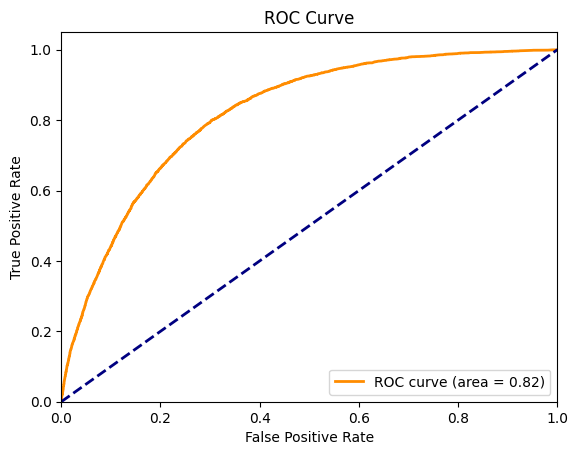

KNeighborsClassifier(n_neighbors=9, p=1.0)
SVC(C=0.0001, gamma=1, kernel='linear', probability=True)
RandomForestClassifier(max_depth=9, min_samples_leaf=5, min_samples_split=6,
                       n_estimators=10)


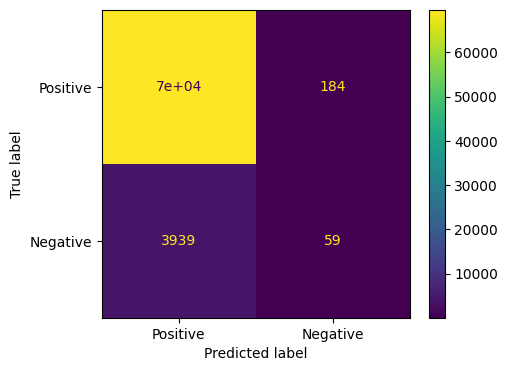

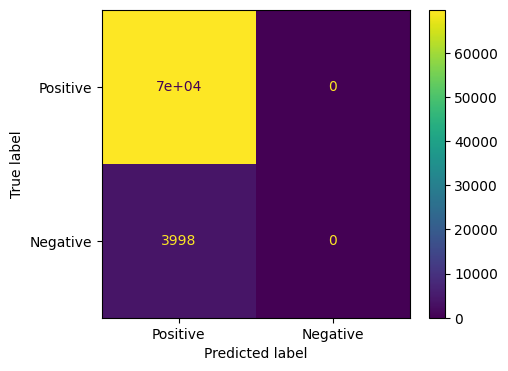

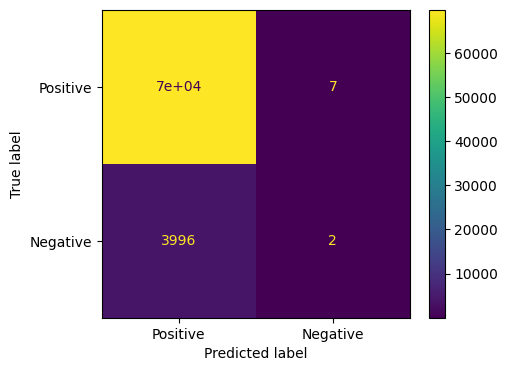

In [9]:
for m in models:
    print(m)
    y_pred = m.predict_proba(X_test)[:, 1]
    # ROC-кривая и ROC-AUC
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    # ROC-кривая
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

for m in models:
    print(m)
    y_pred = m.predict(X_test)
    fig, ax = plt.subplots(figsize=(5, 4), dpi=100)
    cm = confusion_matrix(Y_test, y_pred)
    cmp = ConfusionMatrixDisplay(cm, display_labels=["Positive", "Negative"])
    cmp.plot(ax=ax);

## Визуализация дерева решений

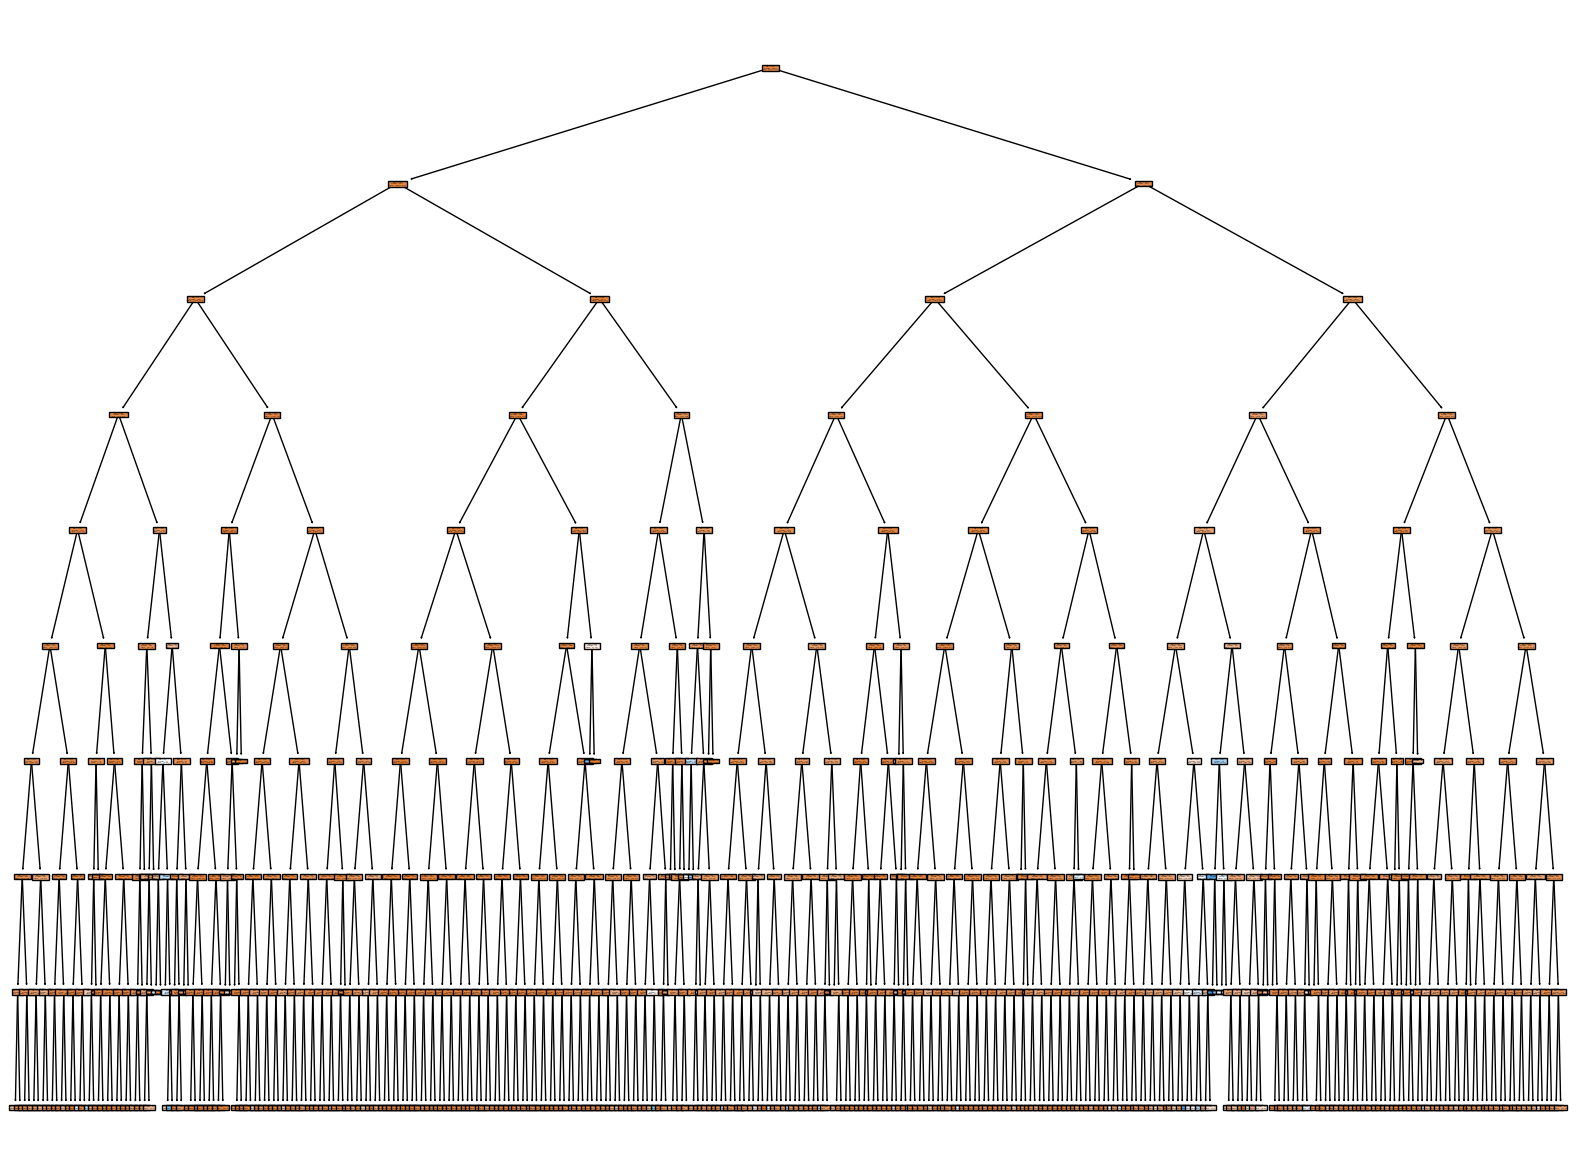

In [10]:
plt.figure(figsize=(20, 15))
tree.plot_tree(rf_best_model[0], feature_names=X_train.columns, filled=True)
plt.show()